# Assigment3-1 -  Scaling Laws from IsoFLOPs profiles 

- 从给定的训练记录中，得到 IsoFlops 方法推导出的 Scaling Law 

In [12]:
import scipy
import json


path = '../data/isoflops_curves.json'
with open(path) as f:
    training_data = json.load(f)

# json.load()
training_data[:5]

[{'parameters': 49999999,
  'compute_budget': 6e+18,
  'final_loss': 7.192784500319437},
 {'parameters': 78730505,
  'compute_budget': 6e+18,
  'final_loss': 6.750171320661809},
 {'parameters': 123969849,
  'compute_budget': 6e+18,
  'final_loss': 6.406639752150447},
 {'parameters': 195204177,
  'compute_budget': 6e+18,
  'final_loss': 6.154368665155925},
 {'parameters': 307370470,
  'compute_budget': 6e+18,
  'final_loss': 5.987783393573661}]

In [ ]:
# handle 
budget2loss = {}
budget2params = {}
# N => (# of parameters),D => (# of datasets), C => (# of compute budget),  
# C = 6 * N  * D 

for obj in training_data:
    budget = obj['compute_budget']
    loss = obj['final_loss']
    params = obj['parameters']
    if budget not in budget2loss:
        budget2loss[budget] = loss
        budget2params[budget] = params
    elif loss < budget2loss[budget]:
        # print(f'{budget}, {loss}, {budget2loss[budget]}')
        # print(f'{budget}, {params}, {budget2params[budget]}')
        budget2loss[budget] = loss
        budget2params[budget] = params
    
budget2data = {k : k / 6 / v for k, v in budget2params.items()}


[6.e+18 1.e+19 3.e+19 6.e+19 1.e+20 3.e+20 6.e+20 1.e+21 3.e+21] [7.62093419e+08 8.06647749e+08 1.53685235e+09 1.95204178e+09
 3.25340296e+09 5.90383603e+09 6.97105597e+09 6.85932856e+09
 1.21489053e+10]
[43.23829114 43.74911677 44.84772906 45.54087624 46.05170186 47.15031415
 47.84346133 48.35428695 49.45289924] [20.4515797  20.50839764 21.15300224 21.39214173 21.90296735 22.49886815
 22.66503255 22.6488754  23.22050491]
[0.46868267 0.15135584] [[ 6.82813792e-04 -3.15785459e-02]
 [-3.15785459e-02  1.46315549e+00]]
[20.41639353 20.65580865 21.17070919 21.49557526 21.73499038 22.24989092
 22.57475699 22.8141721  23.32907264]


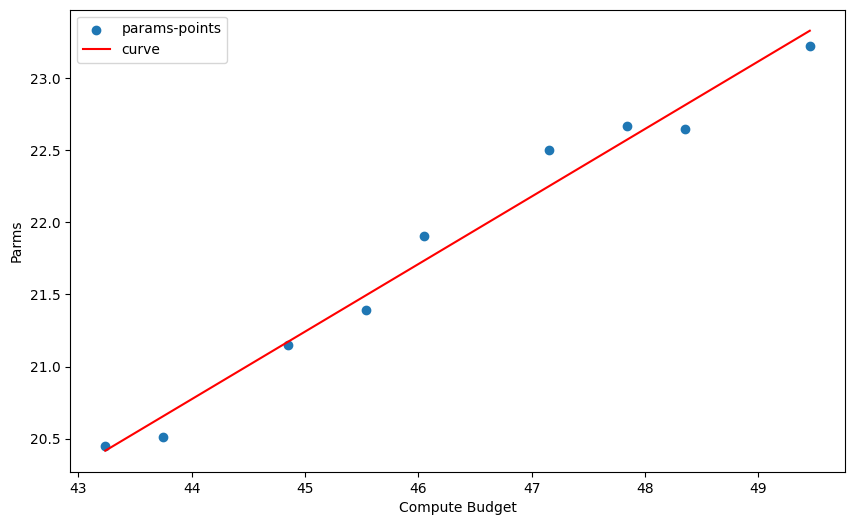

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 准备数据
budgets = np.array(list(budget2loss.keys()))
losses = np.array(list(budget2loss.values()))
params = np.array(list(budget2params.values()), dtype=np.float64)

log_params = np.log(params)
log_budgets = np.log(budgets)


# 直接拟合幂律关系，可能会因为数据溢出导致无法得到参数的值
# logN = a * logC + b
# N = e^a * C + e^b 
def log_linear(C, a, b):
    """C = compute budget, a and b are parameters"""
    return a * C + b

print(budgets, params)
print(log_budgets, log_params)
popt, pcov = scipy.optimize.curve_fit(log_linear, log_budgets, log_params)
print('coefficent : ' , popt)
print('',  pcov)
print(log_linear(log_budgets, *popt))
# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(log_budgets, log_params, label='params-points')
plt.plot(log_budgets, log_linear(log_budgets, *popt), 'r-', label='curve')
plt.xlabel('Compute Budget')
plt.ylabel('Parms')
plt.legend()
plt.show()

In [73]:
# print(budgets, params)
print(f'min budget: {min(budgets)}, max budget {max(budgets)}, step {(max(budgets) - min(budgets)) / len(budgets)}')

min budget: 6e+18, max budget 3e+21, step 3.326666666666667e+20


paratmeter optimal::  [ 0.53131733 -1.94311541]
parameter covariance:  [[ 6.82813760e-04 -3.15785167e-02]
 [-3.15785167e-02  1.46315285e+00]]


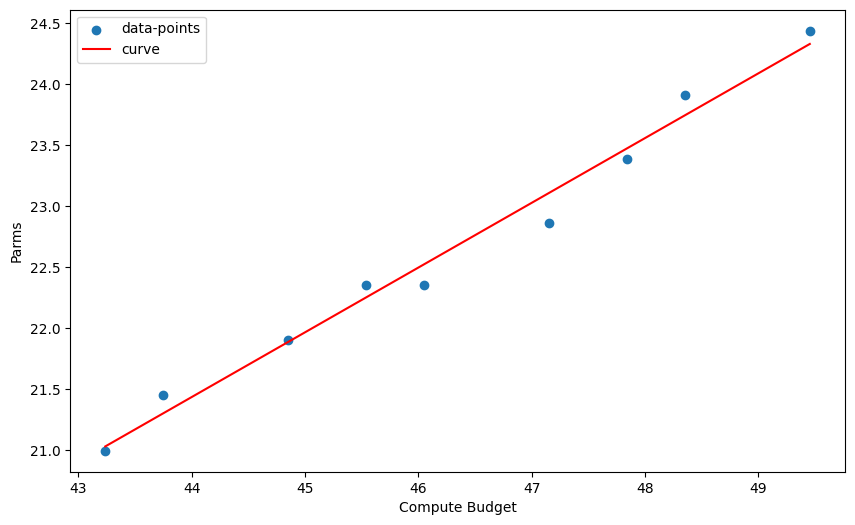

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# 准备数据
budgets = np.array(list(budget2loss.keys()))
data = np.array(list(budget2data.values()), dtype=np.float64)

log_data = np.log(data)
log_budgets = np.log(budgets)


# 直接拟合幂律关系，可能会因为数据溢出导致无法
def log_linear(C, a, b):
    """C = compute budget, a and b are parameters"""
    return a * C + b

# print(budgets, data)
# print(log_budgets, log_data)
popt, pcov = scipy.optimize.curve_fit(log_linear, log_budgets, log_data)
print('paratmeter optimal:: ' , popt)
print('parameter covariance: ',  pcov)
# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(log_budgets, log_data, label='data-points')
plt.plot(log_budgets, log_linear(log_budgets, *popt), 'r-', label='curve')
plt.xlabel('Compute Budget')
plt.ylabel('Parms')
plt.legend()
plt.show()

paratmeter optimal::  [-0.07230661  4.88137675]
parameter covariance:  [[ 6.20838678e-06 -2.87123179e-04]
 [-2.87123179e-04  1.33035103e-02]]


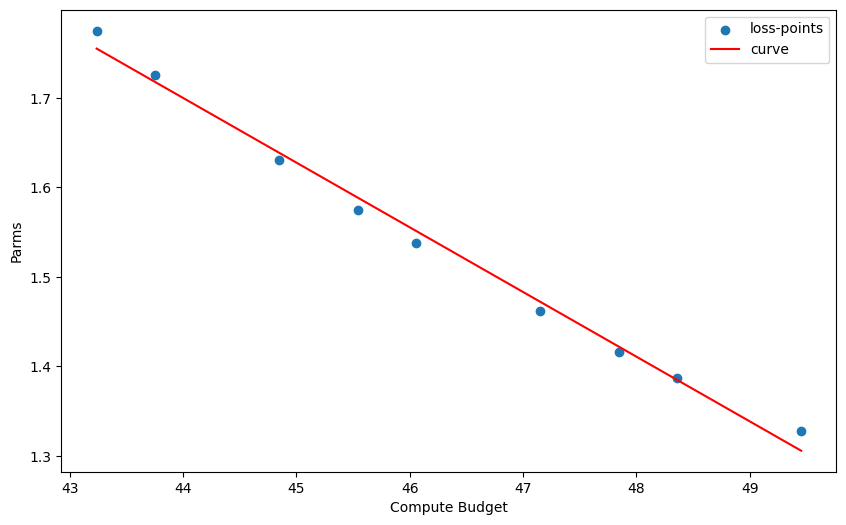

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 准备数据
budgets = np.array(list(budget2loss.keys()))
loss = np.array(list(budget2loss.values()), dtype=np.float64)

# Loss 也是满足幂律的
log_loss = np.log(loss)
log_budgets = np.log(budgets)


# 直接拟合幂律关系，可能会因为数据溢出导致无法
def log_linear(C, a, b):
    """C = compute budget, a and b are parameters"""
    return a * C + b

# print(budgets, loss)
# print(log_budgets, log_loss)
popt, pcov = scipy.optimize.curve_fit(log_linear, log_budgets, log_loss)
print('paratmeter optimal:: ' , popt)
print('parameter covariance: ',  pcov)
# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(log_budgets, log_loss, label='loss-points')
plt.plot(log_budgets, log_linear(log_budgets, *popt), 'r-', label='curve')
plt.xlabel('Compute Budget')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Constructing Scaling Law

给定实验 scaling law 的实验计算量预算（限制可以进行实验的次数），设计一系列实验，确定在给定一个最终的实验预算（flops budget）的条件下：
- 最优的参数模型大小是多少，
- Batch size、 Learn rate 等超参数是多少。 


Training API 

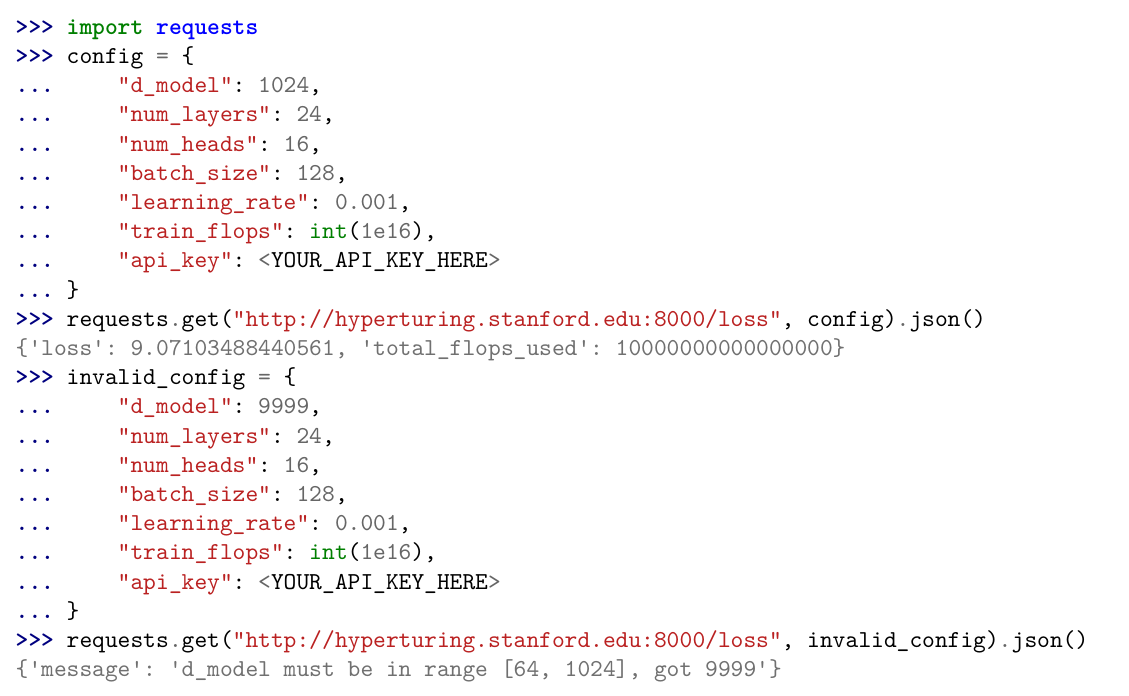

各个参数的取值范围 ：



模型的大小相关的变量，控制这些变量可以控制模型的大小：
- d_model： 模型宽度
- num_layers：模型的深度
- num_heads： attention head 的个数

训练的超参数：
- batch_size：训练的 batch size
- learning rate： 学习率
- train_flops： 训练的长度


要在规定的实验预算下完成上述的需求，需要有下面的假设
- 如果只在 width 上进行拓展的话，在特定的初始化条件下，在小模型下找到的超参数在也能在大模型下使用（muP）。
- batch size 一般而言在一定区间的是越大越好的

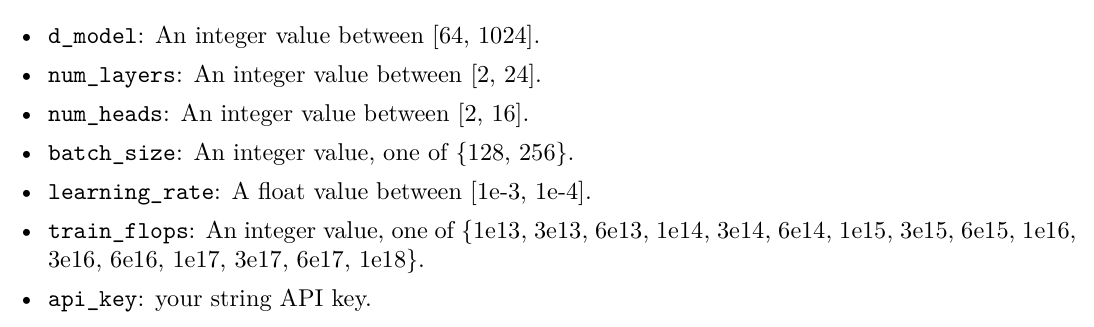

从 training api 的  doocs 中可以看到，给出的模型大小选择只有 4 种，结构上的选择有 8 种（ attention heads 个数），分别的参数量是 

In [69]:
def model_size(d_model, num_layers):
    return 12 * d_model * d_model * num_layers

d_models = [64, 1024]
num_layers = [2, 24]
out = []
for d_model in d_models:
    for num_layer in num_layers:
        out.append((d_model, num_layer, model_size(d_model, num_layer)))
print(sorted(out, key = lambda v : v[-1]))

[(64, 2, 98304), (64, 24, 1179648), (1024, 2, 25165824), (1024, 24, 301989888)]


假设我们已经通过得到了各个深度下的最优学习率。【此处可以直接给定一个模型，改变不同的学习率，根据最终的 loss 确定在该深度下的最有学习率】

给定 flops ，在不同的超参数设计下，能够得到的最优 loss 是多少，对于每一个参数量的模型，需要进行下面的实验找到最优的 loss ：
- 2： 两种不同架构的模型？【head number】 【此处是否可参照,学习率的确定方式，减少两次实验的数量】
- 2： 两个不同的 batch size 【每次都需要运行，不同的架构 / 参数量下需要的 batch size 是不同？但是也有一些结论表明，batch size 是越大越好的】
每个 flops 下有4种不同的参数量，因此要得到一组 flops -> N_opt & L_opt 需要 16 次实验。

要拟合出 scaling law 的幂律线，按照之前的实验：
- 需要 10 组左右不同的  flops -> N_opt & L_opt 数据。
- 之前的实验 flops 的范围 10 ^ 18 到 10^21 之间采样了 10 个点，也就是每个 flops 之间需要跨度为 10 ^ 0.3 左右。

要在不超过 2 * 